In [1]:
import numpy as np

In [112]:
import matplotlib.pyplot as plt

In [47]:
# Averaging matrix
def averaging_matrix(n, m):
    '''
    n: output length
    m: input length
    '''
    n_avg = m // n
    
    def row_average(row):
        x = np.vstack([row*[np.zeros(n_avg, dtype=float)] + [np.ones(n_avg, dtype=float)/n_avg] + (n-1-row)*[np.zeros(n_avg, dtype=float)]])
        return x
    
    A = np.concatenate([row_average(i) for i in range(n)], axis=1)
    A_ = np.hstack([np.eye(n)] + [A])
    return A_

In [103]:
def interp_matrix(n):
    x = np.linspace(1, 0, n)
    
    return np.vstack([x, x[::-1]]).T

In [136]:
n_in = 15
n_out = 5

V_ast = np.ones(n_out)
V_rfi = np.arange(n_in)
x = np.concatenate([V_ast, V_rfi])

A = averaging_matrix(n_out, n_in)
A_inv = np.linalg.pinv(A)

In [119]:
G_p = np.ones(2, dtype=complex) + np.array([0.+0.1j, 0.05+0.05j])
G_q = np.ones(2, dtype=complex) + np.array([-0.05+0.1j, 0.0+0.05j])

R_G = interp_matrix(n_out)

In [123]:
A_p = 3*np.ones(2, dtype=complex) + np.array([0.+0.1j, 0.05+0.05j])
A_q = 3*np.ones(2, dtype=complex) + np.array([-0.05+0.1j, 0.0+0.05j])

R_A = interp_matrix(n_in)

In [130]:
K = np.exp(1.j * np.linspace(1, 10, n_in))

In [132]:
V_pq = np.ones(2, dtype=complex) + np.array([0.+0.5j, 0.05+0.5j])

R_V = interp_matrix(n_out)

In [147]:
GG_p

array([1.        +0.1j       , 1.0125    +0.0875j    ,
       1.025     +0.075j     , 1.0375    +0.0625j    ,
       1.05      +0.05j      , 3.        +0.1j       ,
       3.00357143+0.09642857j, 3.00714286+0.09285714j,
       3.01071429+0.08928571j, 3.01428571+0.08571429j,
       3.01785714+0.08214286j, 3.02142857+0.07857143j,
       3.025     +0.075j     , 3.02857143+0.07142857j,
       3.03214286+0.06785714j, 3.03571429+0.06428571j,
       3.03928571+0.06071429j, 3.04285714+0.05714286j,
       3.04642857+0.05357143j, 3.05      +0.05j      ])

In [134]:
V = np.concatenate([R_V@V_pq, K])
GG_p = np.concatenate([R_G@G_p, R_A@A_p])
GG_q = np.concatenate([R_G@G_q, R_A@A_q])

In [137]:
V_d = A@(GG_p * V * GG_q)

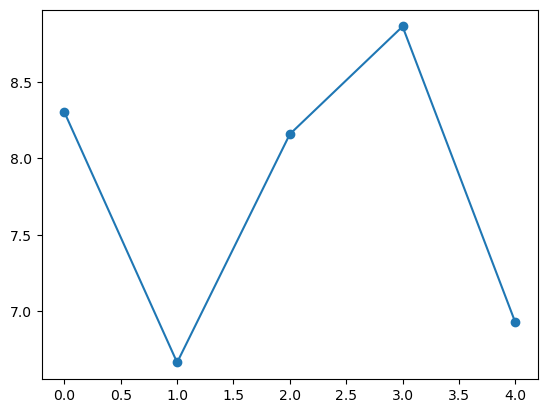

In [150]:
plt.plot(np.abs(V_d), 'o-')

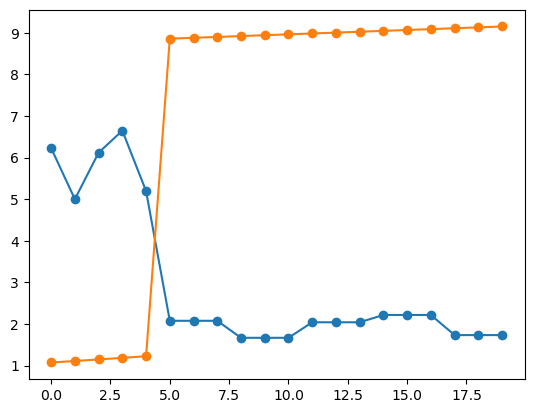

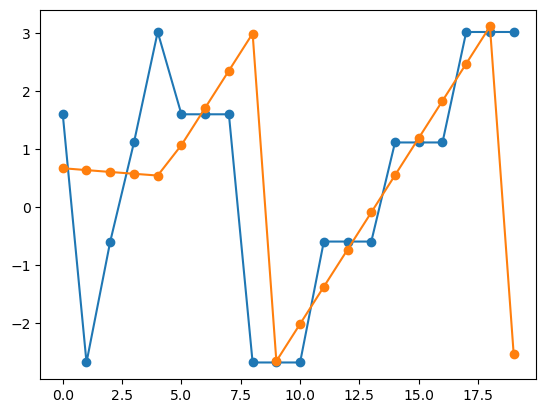

In [151]:
plt.plot(np.abs(A_inv@V_d), 'o-')
plt.plot(np.abs(GG_p * V * GG_q), 'o-')

plt.figure()
plt.plot(np.angle(A_inv@V_d), 'o-')
plt.plot(np.angle(GG_p * V * GG_q), 'o-')

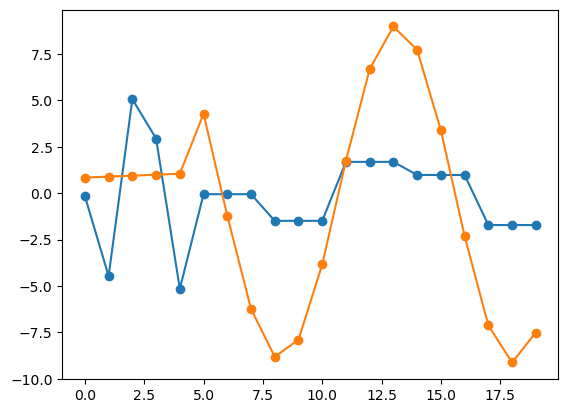

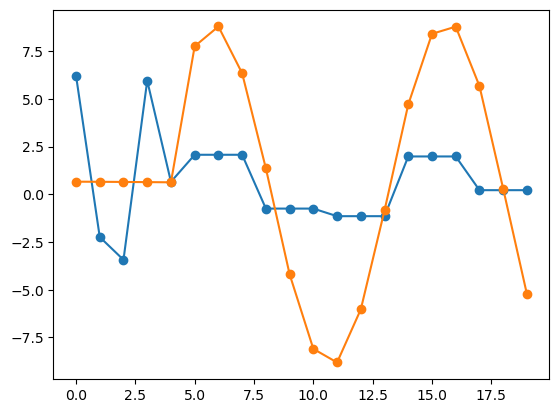

In [161]:
plt.plot(np.real(A_inv@V_d), 'o-')
plt.plot(np.real(GG_p * V * GG_q), 'o-')

plt.figure()
plt.plot(np.imag(A_inv@V_d), 'o-')
plt.plot(np.imag(GG_p * V * GG_q), 'o-')

In [154]:
A@A_inv@A - A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [157]:
A_inv@A@A_inv - A_inv

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [159]:
A_inv@A - np.conj(A_inv@A)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [160]:
A@A_inv - np.conj(A@A_inv)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])